In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

CÓDIGO ORIGINAL
R²: 0.9989755558762513
Função: 0.00010934044213545011 x² + -0.0005923022423731323 x + 0.05463003586888959


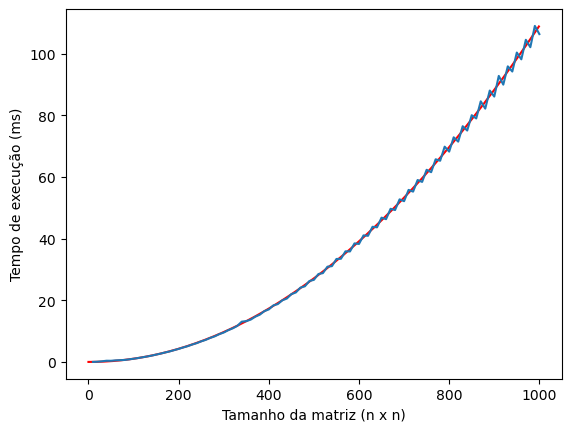

MELHORIA 1
R²: 0.9991604305370282
Função: 0.00010036861714983032 x² + -0.002092773048301296 x + 0.5509327767470609


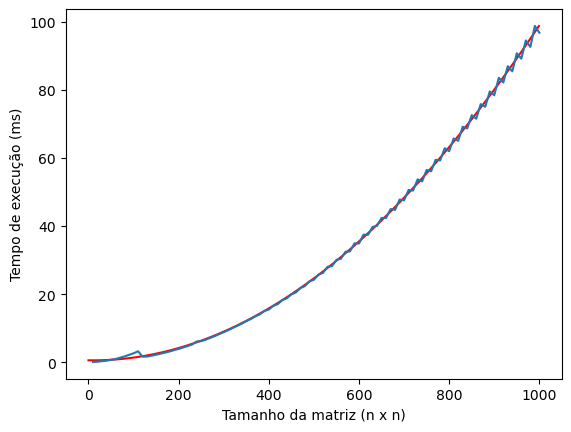

SPEEDUP


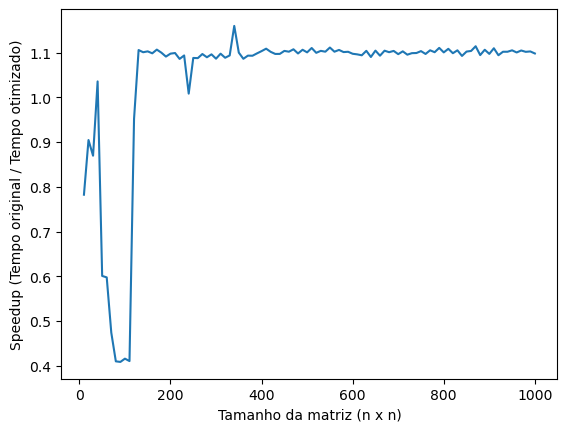

Speedup médio:  1.0459454077638772
Speedup matriz 1000x1000:  1.097862718374427
----------
MELHORIA 2
R²: 0.9993793884947881
Função: 8.175505345252418e-05 x² + -0.001996377284379104 x + 0.2799261929498904


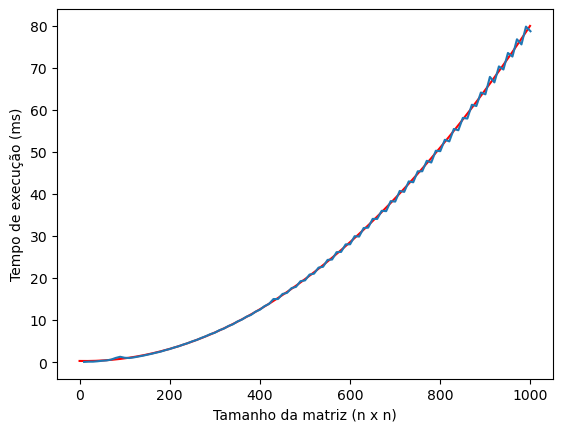

SPEEDUP


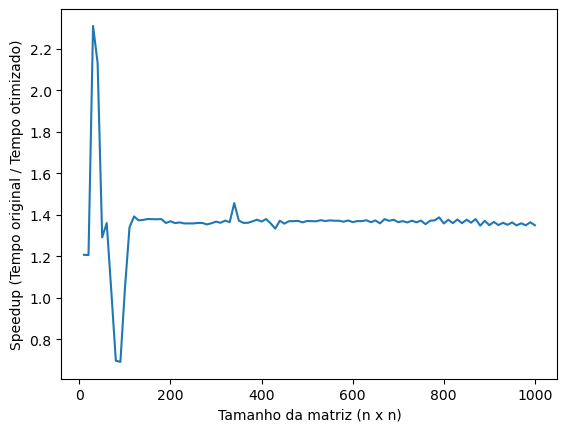

Speedup médio:  1.3604647830899785
Speedup matriz 1000x1000:  1.349878507354304
----------
MELHORIA 3
R²: 0.9990570402107689
Função: 4.9369555635035365e-05 x² + -0.0009715041766842379 x + 0.3987244601113211


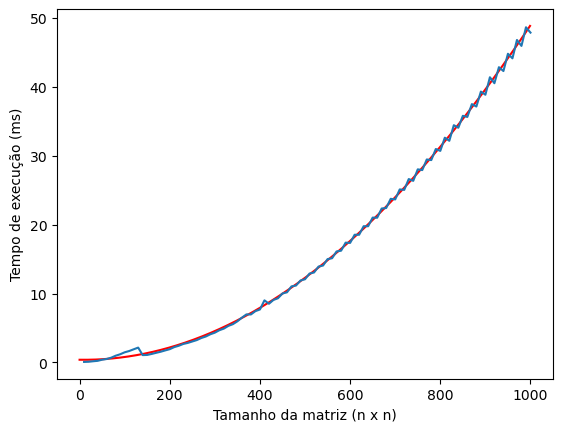

SPEEDUP


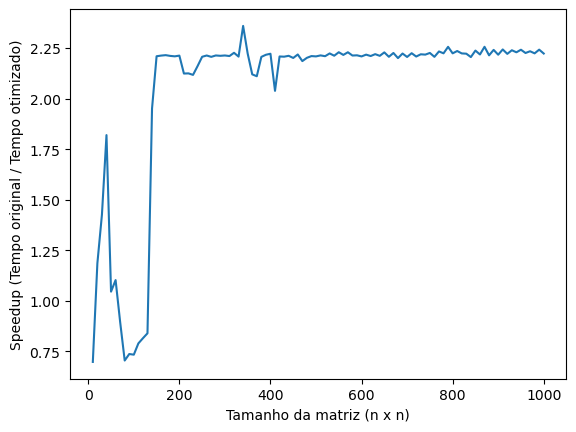

Speedup médio:  2.0497676110423364
Speedup matriz 1000x1000:  2.223271860494292
----------
MELHORIA 4
R²: 0.9992081706745352
Função: 4.9581741463462126e-05 x² + -0.0006087771199208894 x + 0.1801262213976429


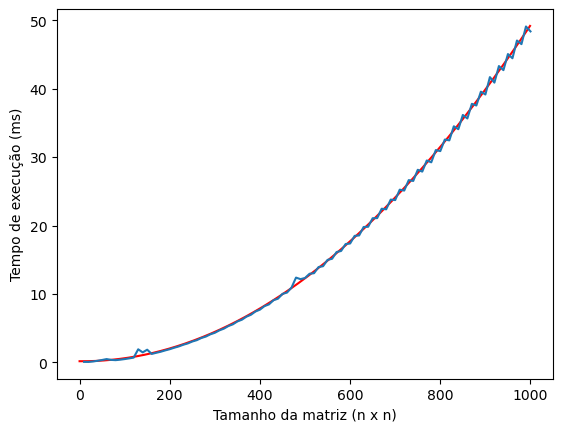

SPEEDUP


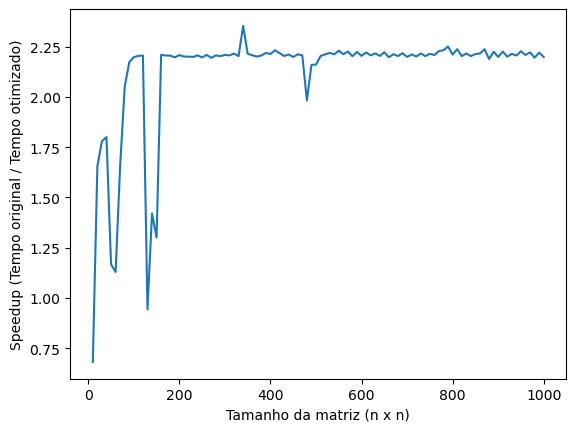

Speedup médio:  2.1216486970152375
Speedup matriz 1000x1000:  2.199094966474878
----------
CÓDIGO OTIMIZADO
R²: 0.9994040629753482
Função: 5.0098049660908504e-05 x² + -0.0008140926237641918 x + 0.1301816722325242


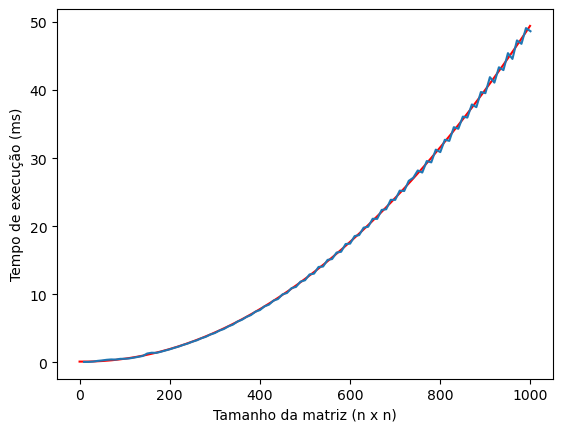

SPEEDUP


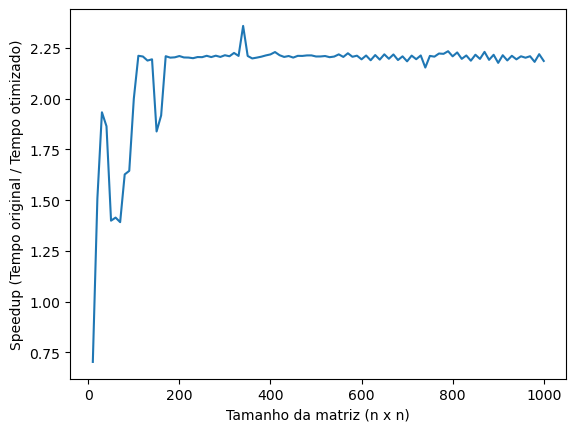

Speedup médio:  2.1361139839039245
Speedup matriz 1000x1000:  2.18636163624176
----------


In [2]:
def ler_arq(arq):
    arr=[]
    with open(arq, "r") as f:
        for line in f.readlines():
            f_list = [i for i in line.split(" ")]
            arr.append([int(f_list[0]), float(f_list[1])])
    format(arr[0][1], '.60g')
    x = np.array([num[0] for num in arr])
    y = np.array([num[1] for num in arr])
    
    return x, y

def gerar_grafico(arq):
    x, y = ler_arq(arq)
    x_transform = x.reshape((-1, 1))
    x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(x_transform)

    model = LinearRegression().fit(x_, y)
    r_sq = model.score(x_, y)
    print(f"R²: {r_sq}")
    coef = [model.intercept_, model.coef_[0], model.coef_[1]]
    
    plt.xlabel('Tamanho da matriz (n x n)')
    plt.ylabel('Tempo de execução (ms)')

    space = np.linspace(0, 1000, 1000)

    graph = coef[2] * (space ** 2) + coef[1] * space + coef[0]
    np.set_printoptions(precision=3, suppress=True)

    print("Função: {}".format(coef[2]), "x² + {}".format(coef[1]), "x + {}".format(coef[0]))

    plt.plot(graph, 'r')
    plt.plot(x, y)
    plt.show()  


def speedup(a, b):
    x1, y1 = ler_arq(a)
    x2, y2 = ler_arq(b)
    arr = []
    
    media = 0
    count = len(y1)
    for i in range(0, count):
        arr.append(y1[i]/y2[i])
        media = media + (y1[i]/ y2[i])
    
    plt.plot(x1, arr)
    plt.xlabel('Tamanho da matriz (n x n)')
    plt.ylabel('Speedup (Tempo original / Tempo otimizado)')
    print("SPEEDUP")
    plt.show()
    print("Speedup médio: ", sum(arr)/count)
    print("Speedup matriz 1000x1000: ", y1[len(y1)-1]/y2[len(y1)-1])
    

print("CÓDIGO ORIGINAL")
gerar_grafico("./res_media_original.out")

print("MELHORIA 1")
gerar_grafico("./melhorias/medias/m1.out")

speedup("./res_media_original.out", "./melhorias/medias/m1.out")
print("----------")


print("MELHORIA 2")
gerar_grafico("./melhorias/medias/m2.out")
speedup("./res_media_original.out", "./melhorias/medias/m2.out")
print("----------")

print("MELHORIA 3")
gerar_grafico("./melhorias/medias/m3.out")
speedup("./res_media_original.out", "./melhorias/medias/m3.out")
print("----------")

print("MELHORIA 4")
gerar_grafico("./melhorias/medias/m4.out")
speedup("./res_media_original.out", "./melhorias/medias/m4.out")
print("----------")

print("CÓDIGO OTIMIZADO")
gerar_grafico("res_media_otimizado_final.out")
speedup("./res_media_original.out", "./res_media_otimizado_final.out")
print("----------")